## **DATASET**

IMPORTACION DE LIBRERIAS

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LECTURA DE DATOS

In [204]:
Lectura=pd.read_csv("datosConcatenadossinCI.csv")

VISUALIZAMOS LOS PRIMEROS DATOS

In [205]:
Lectura.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,...,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
0,0,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,0,0,0,0,NaN,0.0,1.0,NaN,NaN,es_0
1,1,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,14,8,0,0,1F-5,0.0,1.0,NaN,NaN,es_1
2,2,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,23,9,0,0,1F-5,0.0,1.0,NaN,NaN,es_2
3,3,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,14,8,0,0,"1F-1,2F-2",0.0,1.0,NaN,NaN,es_3
4,4,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,4,8,0,0,NaN,0.0,1.0,NaN,NaN,es_4


In [206]:
Lectura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221822 entries, 0 to 221821
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    221822 non-null  int64  
 1   danho         221822 non-null  int64  
 2   ciclo         221822 non-null  int64  
 3   Cod.Asign     221822 non-null  int64  
 4   Asignatura    221822 non-null  object 
 5   Cod.Car.Sec   221822 non-null  object 
 6   Cod.Curso     221822 non-null  int64  
 7   Convocatoria  221822 non-null  int64  
 8   Anho          221822 non-null  int64  
 9   Semestre      221822 non-null  int64  
 10  Aprobado      221822 non-null  object 
 11  Anho.Firma    221822 non-null  int64  
 12  Primer.Par    221822 non-null  int64  
 13  Segundo.Par   221822 non-null  int64  
 14  AOT           221822 non-null  int64  
 15  Primer.Rec    221822 non-null  int64  
 16  Segundo.Rec   221822 non-null  int64  
 17  Nota.Final    137062 non-null  object 
 18  Terc

ANALIZAMOS LOS CODIGO DE CARRERAS

In [207]:
np.unique(Lectura["Cod.Car.Sec"])

array(['CGF-175-09', 'CGF-PLS09 ', 'CGF-PLS13 ', 'CIV-175-09',
       'CIV-PLS09 ', 'CIV-PLS13 ', 'ECA-175-09', 'ECA-PLS09 ',
       'ECA-PLS13 ', 'ECA9-OPT  ', 'ELE-175-09', 'ELE-PLS09 ',
       'ELE-PLS13 ', 'IND-175-09', 'IND-PLS09 ', 'IND-PLS13 ',
       'INT9-PROYT', 'INT9CONSTR', 'INT9ELECTR', 'INT9G-ECO ',
       'INT9MECANI', 'INT9ORTERR', 'INT9RNYMA ', 'INT9SANEHI',
       'INT9SDIGYT', 'INT9TRANSP', 'MCT-175-09', 'MCT-PLS09 ',
       'MCT-PLS13 ', 'MCT9-OPT  ', 'MEC-175-09', 'MEC-PLS09 ',
       'MEC-PLS13 ', 'MEC9-OPT  ', 'TIVAS     '], dtype=object)

SEPARAMOS LOS DATOS PARA SER ANALIZDOS:
En este caso seleccione  los de la carrera de ING. CIVIL

In [208]:
civil=pd.DataFrame(columns=Lectura.columns)
for car in ['CIV-175-09','CIV-PLS09 ', 'CIV-PLS13 ']:
    print(car)
    civil=pd.concat([civil, Lectura[Lectura["Cod.Car.Sec"]==car]], axis=0)

CIV-175-09
CIV-PLS09 
CIV-PLS13 


## REGRESION LINEAL

Visualizo las materias del primer semestre

In [246]:
primerS=civil[ (civil["Cod.Curso"]==1) & (civil["Aprobado"]=="S")]
CprimerS=np.unique(primerS["Asignatura"])
CprimerS


array(['ALGEBRA LINEAL 1', 'CALCULO 1', 'DIBUJO TECNICO', 'FISICA 1',
       'GEOMETRIA ANALITICA', 'GEOMETRIA DESCRIPTIVA'], dtype=object)

FILTRO LOS ID QUE CURSARON TODAS MATERIAS DEL CUARTO SEMESTRE

In [247]:
newdata=pd.DataFrame(columns=civil.columns)
for mat in ['CALCULO 4', 'DINAMICA', 'ESTRUCTURAS 1', 'FISICA 4',
       'MECANICA DE MATERIALES 1']:
    newdata=pd.concat([newdata, civil[civil["Asignatura"]==mat]], axis=0)
    print(mat)
print('Cantidad de elementos',newdata.shape)

CALCULO 4
DINAMICA
ESTRUCTURAS 1
FISICA 4
MECANICA DE MATERIALES 1
Cantidad de elementos (8848, 23)


SEGUIDAMENTE FILTRO SOLO LOS QUE TIENEN APROBADO ESAS MATERIAS

In [248]:
df=newdata[newdata["Aprobado"]=="S"]
print('Cantidad de elementos',df.shape)


Cantidad de elementos (4054, 23)


LUEGO VISUALIZAMOS LA CANTIDAD DE ESTUDIANTES REALES

In [249]:
estudiantes=np.unique(df['id_anony'])
materias=np.unique(df['Asignatura'])
print(len(estudiantes))

968


Filtramos solo los alumnos que aprobaron Cursos Basicos


In [250]:
Alumnos=[]
Alumnos.clear()
Inicio=[]
Inicio.clear()
Duracion=[]
Duracion.clear()
for ides in estudiantes:
    registro=df[df.id_anony.values==ides]
    regis=civil[civil.id_anony.values==ides]
    cant=np.unique(registro["Asignatura"])
    a=np.sum(cant=='CALCULO 4')
    a=a+np.sum(cant=='DINAMICA')
    a=a+np.sum(cant=='ESTRUCTURAS 1')
    a=a+np.sum(cant=='FISICA 4')
    a=a+np.sum(cant=='MECANICA DE MATERIALES 1')
    regi=np.sum((regis["Cod.Curso"].values==1))
    if (a==5)&(regi>0):
        ides
        AnhoIn=min(regis["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)

Creamos un nuevo Dataset

In [251]:
Datos=pd.DataFrame({'Alumnos':Alumnos,'Ingreso':Inicio,'Duracion':Duracion})
Datos

,Alumnos,Ingreso,Duracion
0,es_1164,2012,4
1,es_1185,2012,3
2,es_1204,2012,8
3,es_1244,2012,5
4,es_1253,2012,4
...,...,...,...
415,es_4087,2018,2
416,es_4104,2018,2
417,es_4134,2018,2
418,es_4156,2018,2


VISUALIZAMOS LO OBTENIDO

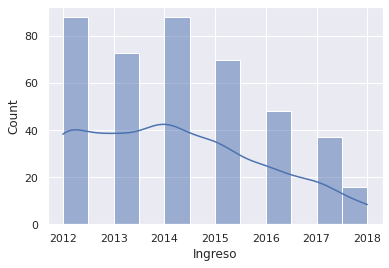

In [252]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=Datos, x="Ingreso",kde=True)
plt.show()

In [253]:
xlin=Datos.iloc[:,1].values
Xlin=xlin.reshape(-1, 1)
ylin=Datos.iloc[:,2].values

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [255]:
X_train,X_test,Y_train,Y_test=train_test_split(Xlin,ylin,test_size=0.1,random_state=0)
print("Train Data shape: " + str(X_train.shape)) #datos  
print("test Data shape: " + str(X_test.shape))
print("Train labels shape: " + str(Y_train.shape)) #datos  
print("test labels shape: " + str(Y_test.shape))

Train Data shape: (378, 1)
test Data shape: (42, 1)
Train labels shape: (378,)
test labels shape: (42,)


In [256]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [257]:
R_sq=lm.score(X_train,Y_train)
print('Coeficiente de determinacion',R_sq)
print('b0:',lm.intercept_)
print('b1:',lm.coef_)

Coeficiente de determinacion 0.18393233172103607
b0: 663.0921736215854
b1: [-0.32755153]


In [258]:
prediccion = lm.predict(X_test)
prediccion

array([3.73093682, 2.74828222, 4.05848835, 3.73093682, 3.73093682,
       3.40338529, 4.05848835, 3.07583375, 3.40338529, 3.07583375,
       4.05848835, 3.73093682, 3.73093682, 3.40338529, 2.74828222,
       3.40338529, 3.73093682, 2.09317915, 2.74828222, 3.07583375,
       4.05848835, 4.05848835, 3.07583375, 4.05848835, 2.74828222,
       2.42073069, 3.07583375, 3.73093682, 3.73093682, 3.40338529,
       2.42073069, 4.05848835, 3.07583375, 3.07583375, 3.73093682,
       2.74828222, 4.05848835, 3.73093682, 3.73093682, 2.42073069,
       4.05848835, 3.07583375])

In [259]:
np.mean(prediccion)

3.38778759366996

In [260]:
mse = mean_squared_error(Y_test,prediccion)
print('Error cuadratico medio:',mse)

Error cuadratico medio: 1.6431632056465548


## **REGRESION LOGISTICA**

In [261]:
civil=civil[civil["Cod.Curso"]<5]


In [262]:
daf=civil[(civil["Aprobado"]=="S")|(civil["Aprobado"]=="N") ]

In [263]:
estudiantes=np.unique(daf['id_anony'])
materias=np.unique(daf['Asignatura'])
print(len(estudiantes))

2006


In [264]:
Alumnos=[]
Alumnos.clear()
Inicio=[]
Inicio.clear()
Duracion=[]
Duracion.clear()
Aprobado=[]
Aprobado.clear()
Mate=[]
Mate.clear()
for ides in estudiantes:
    registro=daf[daf.id_anony.values==ides]
    cant=np.unique(registro["Asignatura"])
    a=np.sum(cant=='CALCULO 4')
    a=a+np.sum(cant=='DINAMICA')
    a=a+np.sum(cant=='ESTRUCTURAS 1')
    a=a+np.sum(cant=='FISICA 4')
    a=a+np.sum(cant=='MECANICA DE MATERIALES 1')
    regi=np.sum((registro["Cod.Curso"].values==1))
    pasadas=registro[registro["Aprobado"]=="S"]
    pasadas=np.unique(registro["Asignatura"])
    if regi>0:
      if (a==5):
        AnhoIn=min(registro["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        Aprobado.append(1)
    
        Mate.append(len(pasadas))

      else :
        AnhoIn=min(registro["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        Aprobado.append(0)
        Mate.append(len(pasadas))
      
    

In [265]:
Datos=pd.DataFrame({'Alumnos':Alumnos,'Ingreso':Inicio,'Duracion':Duracion,'Materias':Mate,'CB Fin':Aprobado})
Datos

,Alumnos,Ingreso,Duracion,Materias,CB Fin
0,es_104,2012,9,14,0
1,es_1102,2012,1,11,0
2,es_1104,2012,4,22,1
3,es_1108,2012,7,11,0
4,es_1114,2012,4,20,1
...,...,...,...,...,...
1516,es_496,2012,2,4,0
1517,es_628,2012,1,8,0
1518,es_766,2012,9,17,1
1519,es_818,2012,2,4,0


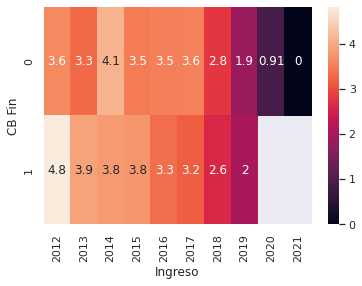

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt
table = pd.pivot_table(Datos,columns='Ingreso', values='Duracion', index='CB Fin')
sns.heatmap(table,annot=True)

In [267]:
x=Datos.iloc[:,1].values
X=x.reshape(-1, 1)
y=Datos.iloc[:,4].values

In [268]:
X=Datos[['Ingreso','Duracion','Materias']].values

In [269]:
Y=Datos['CB Fin'].values

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [271]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)
print("Train Data shape: " + str(X_train.shape)) #datos  
print("test Data shape: " + str(X_test.shape))
print("Train labels shape: " + str(Y_train.shape)) #datos  
print("test labels shape: " + str(Y_test.shape))

Train Data shape: (1368, 3)
test Data shape: (153, 3)
Train labels shape: (1368,)
test labels shape: (153,)


In [272]:
log_regression=LogisticRegression()

In [273]:
log_regression.fit(X_train,Y_train)

LogisticRegression()

In [274]:
Y_pred=log_regression.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [275]:
print('La cantidad de alumnos:',Y_pred.shape)
nP=np.sum(Y_pred[:]==0)
print('Alumnos que no aprobaron:',nP)
P=np.sum(Y_pred[:]==1)
print('Alumnos que aprobaron:',P)

La cantidad de alumnos: (153,)
Alumnos que no aprobaron: 105
Alumnos que aprobaron: 48


Diagnosticos del modelo

In [276]:
matrix_confu=metrics.confusion_matrix(Y_test,Y_pred)
matrix_confu

array([[102,   3],
       [  3,  45]])

In [277]:
dataframe=pd.DataFrame(matrix_confu)

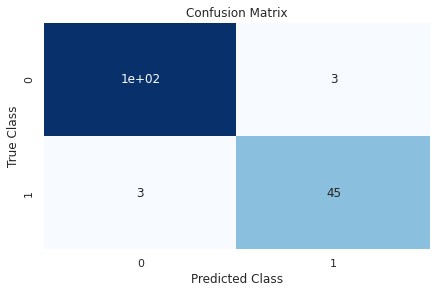

In [278]:
sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"),plt.xlabel("Predicted Class")
plt.show()

In [279]:
print("Precision del modelo:",metrics.accuracy_score(Y_test,Y_pred))

Precision del modelo: 0.9607843137254902
